<a href="https://colab.research.google.com/github/anjot2807/quality_of_wine_prognosis/blob/main/quality_of_wine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis Overview:**
The goal of this analysis was to predict the quality of wine based on various chemical and physical properties. The dataset includes features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and the target variable, quality.

Machine learning models were likely trained on this dataset to learn patterns and relationships between the input features and the quality of wine. Evaluation metrics such as ROC-AUC or accuracy may have been used to assess the performance of the models in predicting wine quality.

The analysis is essential for understanding the factors influencing wine quality and can assist in optimizing wine production processes. Additionally, insights gained from this analysis may guide improvements in the wine-making process to enhance the overall quality of the final product.

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score


Variable Description:

1. Fixed Acidity:

Definition: The amount of non-volatile acids in the wine.
Range: Numeric values representing the acidity level.

2. Volatile Acidity:
Definition: The amount of acetic acid in the wine, which can lead to an unpleasant vinegar taste.
Range: Numeric values indicating the volatile acidity level.

3. Citric Acid:

Definition: Presence of citric acid, contributing to freshness and flavor.

Range: Numeric values describing the citric acid content.

4. Residual Sugar:

Definition: The amount of sugar remaining after fermentation.
Range: Numeric values representing the residual sugar content.
Chlorides:

Definition: The amount of salt in the wine.
Range: Numeric values indicating chloride concentration.

5. Free Sulfur Dioxide:

Definition: The free form of SO2, which prevents microbial growth and oxidation.
Range: Numeric values representing the free sulfur dioxide level.

6. Total Sulfur Dioxide:

Definition: The total amount of SO2, combining both free and bound forms.
Range: Numeric values describing the total sulfur dioxide content.

7. Density:

Definition: The density of the wine.
Range: Numeric values indicating the density level.

8. pH:

Definition: The pH level measures the acidity or basicity of the wine.
Range: Numeric values representing the pH level.

9. Sulphates:

Definition: Presence of sulfates, which can contribute to sulfur dioxide gas.
Range: Numeric values indicating the sulfate content.

10. Alcohol:

Definition: The alcohol content in the wine.
Range: Numeric values representing the alcohol level.

11. Quality:

Definition: The target variable representing the quality of the wine.
Range: Discrete values (e.g., 3, 4, 5, 6, 7, 8) indicating the perceived quality.

In [2]:
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white = pd.read_csv('/content/winequality-white.csv', sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_wine = pd.concat([df_red, df_white], ignore_index=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


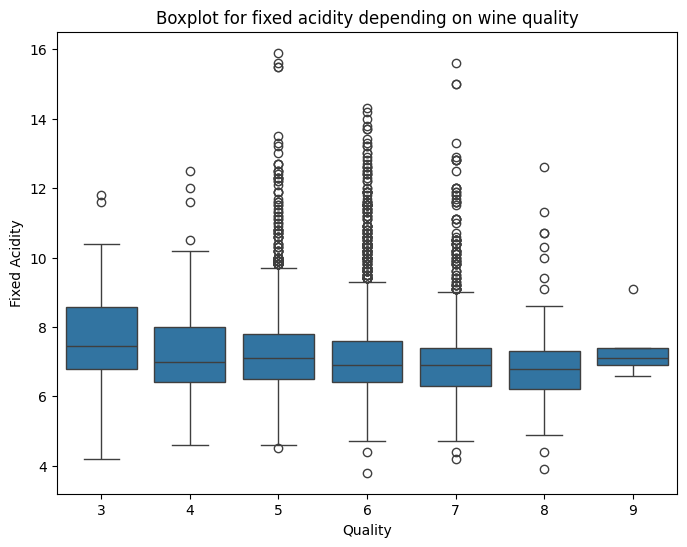

In [6]:
# fixed acidity does not give any specification to classify the quality

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='fixed acidity', data=df_wine)

plt.title('Boxplot for fixed acidity depending on wine quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

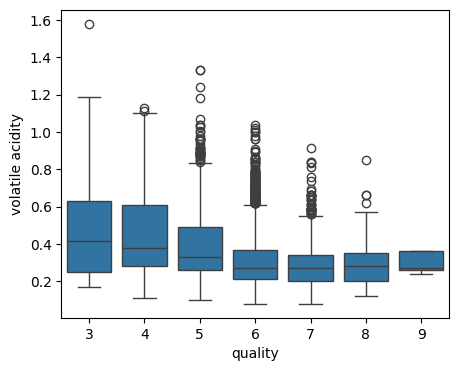

In [7]:
# a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize = (5,4))
sns.boxplot(x='quality', y='volatile acidity', data=df_wine)

<Axes: xlabel='quality', ylabel='citric acid'>

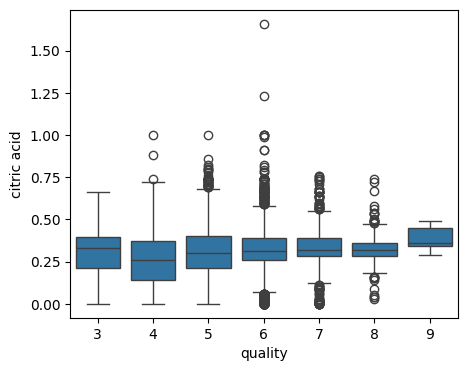

In [8]:
#citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (5,4))
sns.boxplot(x='quality', y='citric acid', data=df_wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

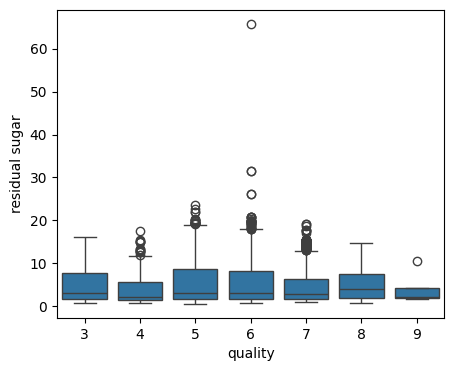

In [9]:
# residual sugar has no visible effect on the quality of wine
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'quality', y = 'residual sugar', data = df_wine)

<Axes: xlabel='quality', ylabel='chlorides'>

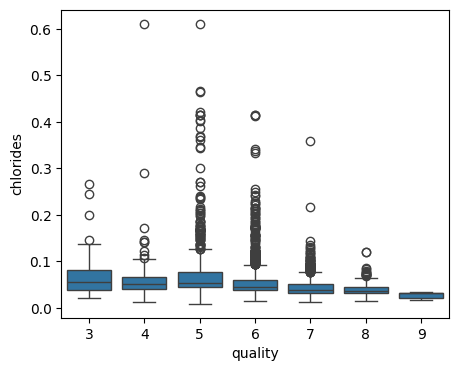

In [10]:
#chloride go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'quality', y = 'chlorides', data = df_wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

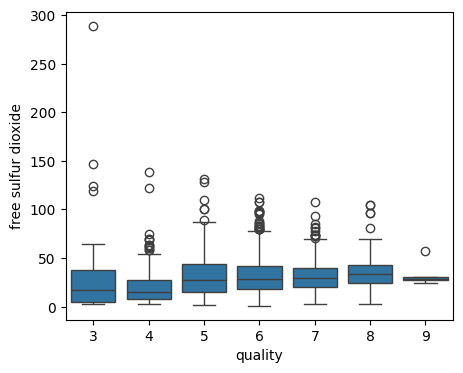

In [11]:
# there is no clear relationship between free sulfur dioxide and wine quality
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = df_wine)

<Axes: xlabel='quality', ylabel='alcohol'>

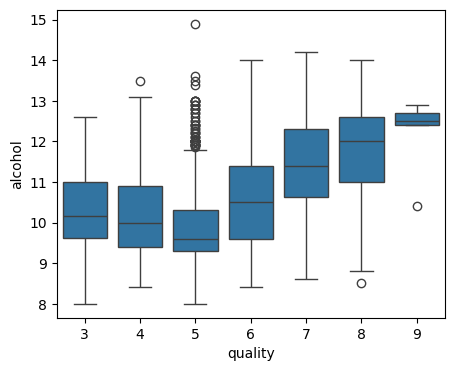

In [12]:
# Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'quality', y = 'alcohol', data = df_wine)

In [13]:
print("Statistics:")
print(df_wine.describe())

Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000

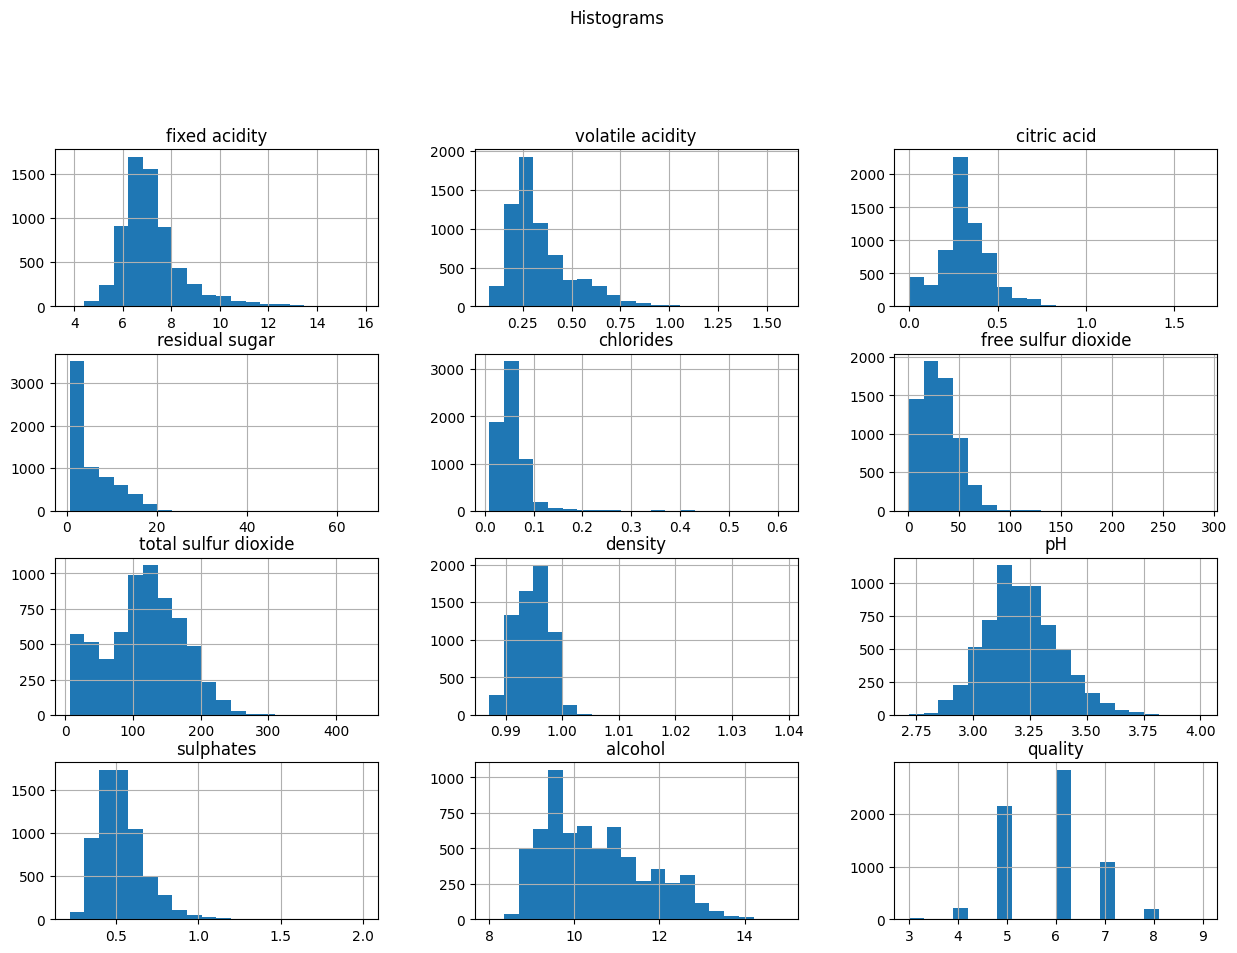

In [14]:
df_wine.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms", y=1.02)
plt.show()

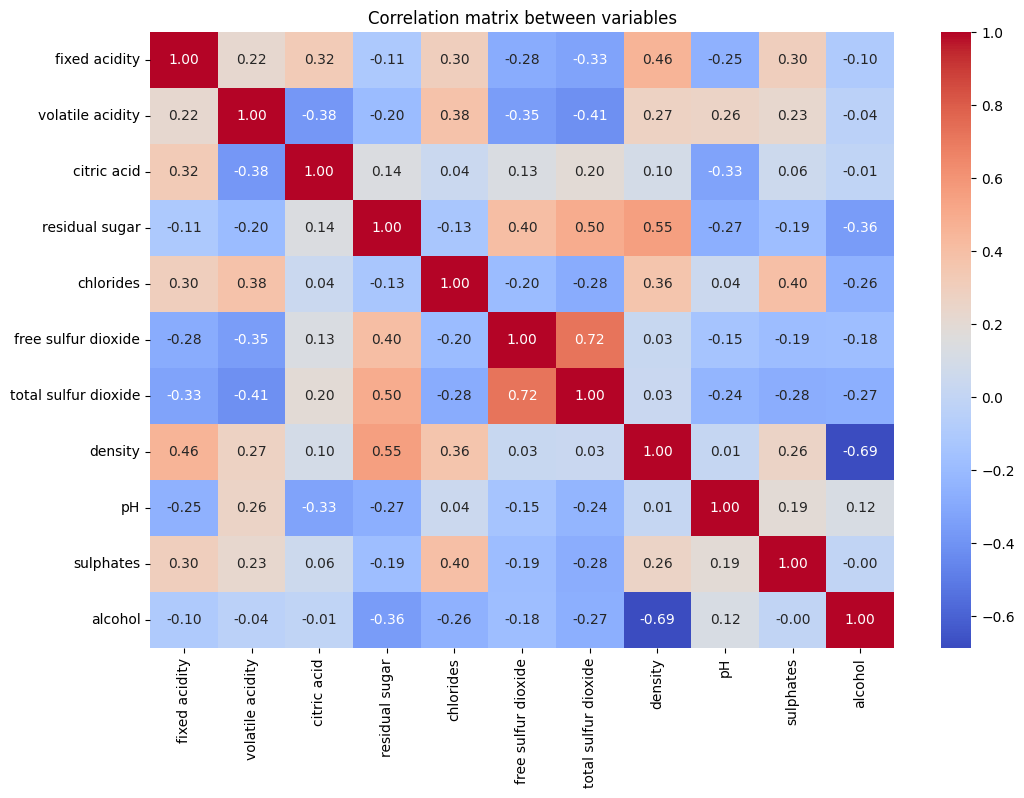

In [15]:
# Correlation matrix
df_wine_cor = df_wine.drop(columns=['quality'])
correlation_matrix = df_wine_cor.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between variables")
plt.show()

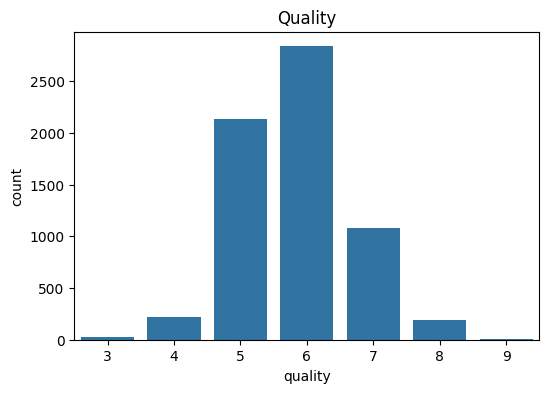

In [16]:
# quality
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df_wine)
plt.title("Quality")
plt.show()

In [17]:
#grouping columns for larger amounts of data
df_wine['quality'] = df_wine['quality'].replace({3: 4, 4: 4, 8: 8, 9: 8})

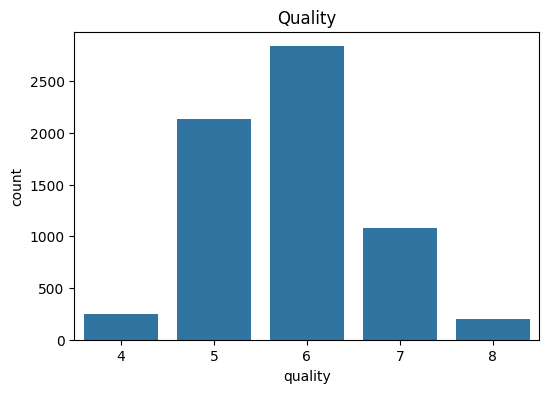

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df_wine)
plt.title("Quality")
plt.show()

Results of the ANOVA test for the variable alcohol
F Statistics: 480.66752094694056
p value: 0.0


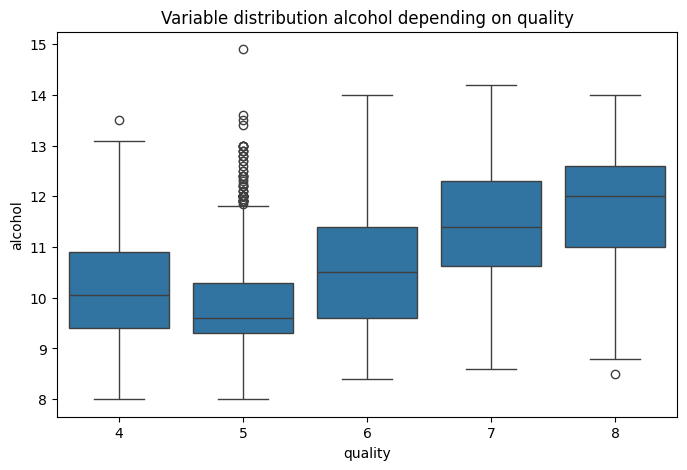

In [19]:
# ANOVA test for "alcohol" variable
variable_to_analyze = 'alcohol'

result = f_oneway(*[group[variable_to_analyze].dropna() for name, group in df_wine.groupby('quality')])

print("Results of the ANOVA test for the variable", variable_to_analyze)
print("F Statistics:", result.statistic)
print("p value:", result.pvalue)

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y=variable_to_analyze, data=df_wine)
plt.title(f'Variable distribution {variable_to_analyze} depending on quality')
plt.show()

Results of the ANOVA test for the variable pH
F Statistics: 2.520065871156617
p value: 0.039199492124502675


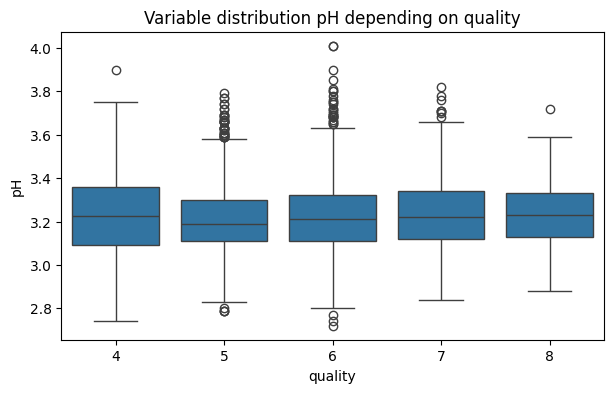

In [20]:
# ANOVA test for "pH" variable
variable_to_analyze = 'pH'

result = f_oneway(*[group[variable_to_analyze].dropna() for name, group in df_wine.groupby('quality')])

print("Results of the ANOVA test for the variable", variable_to_analyze)
print("F Statistics:", result.statistic)
print("p value:", result.pvalue)

#boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x='quality', y=variable_to_analyze, data=df_wine)
plt.title(f'Variable distribution {variable_to_analyze} depending on quality')
plt.show()

In [21]:
X = df_wine.drop(columns=['quality'])
y = df_wine['quality']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train

1916    5
947     7
877     6
2927    6
6063    5
       ..
3772    5
5191    7
5226    5
5390    5
860     5
Name: quality, Length: 5197, dtype: int64

In [24]:
linear_model = LogisticRegression()

linear_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [28]:
# unique values in "quality"
unique_values = df_wine['quality'].unique()
print("unique values 'quality':", unique_values)

unique values 'quality': [5 6 7 4 8]


In [29]:
# fitting
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [37]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [31]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [32]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.3331

Confusion Matrix:
[[ 26   6   7   5   5]
 [133 161  51  30  27]
 [ 86 136 158 119  98]
 [  9  20  34  64  88]
 [  3   1   1   8  24]]

Classification Report:
              precision    recall  f1-score   support

           4       0.10      0.53      0.17        49
           5       0.50      0.40      0.44       402
           6       0.63      0.26      0.37       597
           7       0.28      0.30      0.29       215
           8       0.10      0.65      0.17        37

    accuracy                           0.33      1300
   macro avg       0.32      0.43      0.29      1300
weighted avg       0.50      0.33      0.37      1300



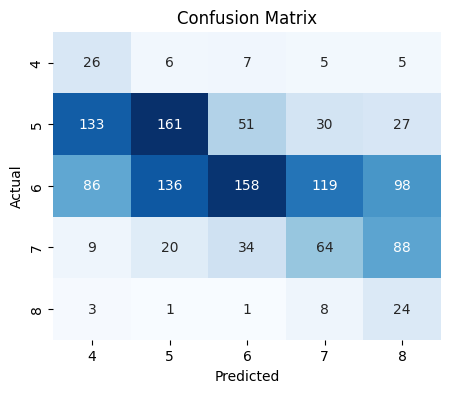

In [33]:
# creating confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

#y_proba = model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print(f"\nMacro ROC AUC: {roc_auc:.4f}")


Macro ROC AUC: 0.7434


In [55]:
# Binarizacja etykiet
y_test_bin = label_binarize(y_test, classes=[4, 5, 6, 7, 8])

# Calculate ROC curve for multi-class classification
fpr = dict()
tpr = dict()
roc_auc = dict()


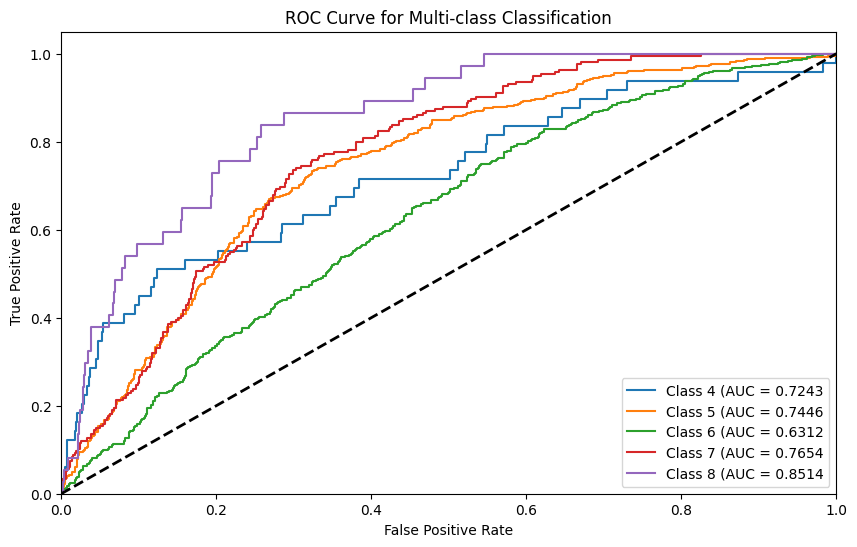

In [57]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 6))

for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+4} (AUC = {roc_auc[i]:.4f}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

Summary:

The model shows limited success in correctly predicting wine quality, with relatively low precision, recall, and F1-scores across all classes.

The imbalance in class distribution may contribute to the model's struggle, as indicated by the macro-average and weighted average metrics.

Further analysis and model refinement may be necessary to improve the classification performance, such as feature engineering, hyperparameter tuning, or considering alternative algorithms.
Additionally, exploring the impact of class imbalance and potential strategies, like adjusting class weights, may be beneficial